In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
import pandas as pd


In [3]:

#defining function for finding omega
def f(t, th, w):
    return w
#defining function for finding theta
def g(t, th, w):
    return ( - 9.8 * np.sin(th) )

In [4]:
#parameters
t = np.linspace(0, 10, 200+1)
th = [0.25]
w = [0.0]
h=0.05
a=[]

In [5]:

#Runge Kutta 4th order method
for i in range(200):
    k1 = h * f( t[i], th[i], w[i])
    l1 = h * g( t[i], th[i], w[i])
    k2 = h * f( t[i] + h/2, th[i] + k1 / 2 , w[i] + l1 / 2 )
    l2 = h * g(t[i] + h/2, th[i] + k1/2, w[i] + l1 / 2)
    k3 = h * f(t[i] + h/2, th[i] + k2/2, w[i] + l2 /2)
    l3 = h * g(t[i] + h/2, th[i] + k2/2, w[i] + l2/2)
    k4 = h * f(t[i] + h, th[i] + k3, w[i] + l3 )
    l4 = h * g(t[i] + h, th[i] + k3, w[i] + l3)
    th.append(th[i] + (k1 + 2 * k2 + 2 * k3 + k4)/6)
    w.append(w[i]  + (l1 + 2 * l2 + 2 * l3 + l4)/6)
    

In [6]:

#for finding acceleration
for i in th:
      a.append(-9.8 * np.sin(i))

In [7]:
#Analytical Solution
def theta(t):
    return 0.25 * np.cos(np.sqrt(9.8) * t)
def omega(t):
    return (-0.25 * np.sqrt(9.8) * np.sin(np.sqrt(9.8)*t))
def alpha(t):
    return -0.25 * 9.8 * np.cos(np.sqrt(9.8) * t)


In [8]:
d=[]
d.append(theta(t))
f=[]
f.append(omega(t))
u=[]
u.append(alpha(t))

In [9]:
#numerical values for angular velocity:
numerical_v = pd.DataFrame(w)
numerical_v


,0
0,0.000000
1,-0.120748
2,-0.238632
3,-0.350844
4,-0.454688
...,...
196,0.589039
197,0.502367
198,0.403633
199,0.295253


In [10]:
#analytical values for angular velocity
analytical_v = pd.DataFrame(f)
analytical_v.loc[0]

0     -0.000000
1     -0.122000
2     -0.241018
3     -0.354142
4     -0.458608
         ...   
196    0.526020
197    0.429256
198    0.321996
199    0.206864
200    0.086673
Name: 0, Length: 201, dtype: float64

Text(0, 0.5, ' Angular Velocity(rad/s)')

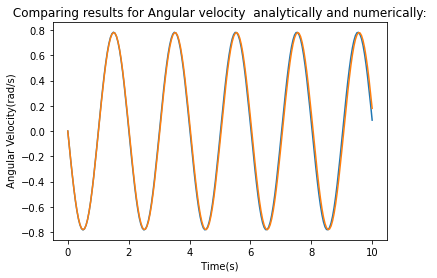

In [20]:
#Comparing results for Angular velocity  analytically and numerically:
plt.plot(t,omega(t))
plt.plot(t,w)
plt.title ( ' Comparing results for Angular velocity  analytically and numerically: ' )
plt.xlabel ( ' Time(s) ' )
plt.ylabel ( ' Angular Velocity(rad/s)' )
#BLUE COLOR - ANALYTICAL METHOD
#ORANGE COLOR - NUMERICAL METHOD

In [54]:
#numerical value for angular acceleration:
numerical_a = pd.DataFrame(a)
numerical_a

,0
0,-2.424559
1,-2.395827
2,-2.310185
3,-2.169308
4,-1.976035
...,...
196,-1.597996
197,-1.861712
198,-2.079577
199,-2.246910


In [81]:
#analytical values for angular acceleration:
analytical_a = pd.DataFrame(u)
analytical_a.loc[0]


0     -2.450000
1     -2.420049
2     -2.330927
3     -2.184814
4     -1.985283
         ...   
196   -1.814074
197   -2.048596
198   -2.233029
199   -2.362865
200   -2.434929
Name: 0, Length: 201, dtype: float64

Text(0, 0.5, ' Angular acceleration(rad/s^2)')

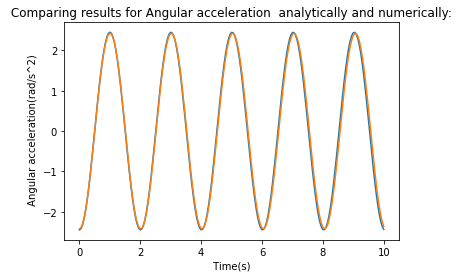

In [18]:
#Comparing results for Angular acceleration analytically and numerically
plt.plot(t,alpha(t))
plt.plot(t,a)
plt.title ( ' Comparing results for Angular acceleration  analytically and numerically: ' )
plt.xlabel ( ' Time(s) ' )
plt.ylabel ( ' Angular acceleration(rad/s^2)' )
#BLUE COLOR - ANALYTICAL METHOD
#ORANGE COLOR - NUMERICAL METHOD